In [29]:
# importing tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [23]:
# read csv
df = pd.read_csv("mental_health_analysis.csv")

In [4]:
# view the first few rowa
df.head()

,User_ID,Age,Gender,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Support_System,Academic_Performance
0,1,16,F,9.654486,2.458001,5.198926,8.158189,3,0.288962,Moderate,Excellent
1,2,17,M,9.158143,0.392095,8.866097,5.151993,5,0.409446,Moderate,Good
2,3,15,M,5.028755,0.520119,4.943095,9.209325,2,0.423837,Moderate,Poor
3,4,17,F,7.951103,1.022630,5.262773,9.823658,5,0.666021,Moderate,Average
4,5,17,F,1.357459,1.225462,6.196080,11.338990,5,0.928060,High,Poor


In [6]:
# to view the number of rows and columns
df.head

<bound method NDFrame.head of       User_ID  Age Gender  Social_Media_Hours  Exercise_Hours  Sleep_Hours  \
0           1   16      F            9.654486        2.458001     5.198926   
1           2   17      M            9.158143        0.392095     8.866097   
2           3   15      M            5.028755        0.520119     4.943095   
3           4   17      F            7.951103        1.022630     5.262773   
4           5   17      F            1.357459        1.225462     6.196080   
...       ...  ...    ...                 ...             ...          ...   
4995     4996   14      M            0.088148        1.003339     8.684888   
4996     4997   15      F            7.161276        1.024644     5.312684   
4997     4998   14      M            3.444383        2.877972     9.227726   
4998     4999   18      F            7.866525        2.395839     4.317831   
4999     5000   18      M            3.389362        1.375646     8.693171   

      Screen_Time_Hours  Survey_S

In [7]:
# data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   User_ID                5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Gender                 5000 non-null   object 
 3   Social_Media_Hours     5000 non-null   float64
 4   Exercise_Hours         5000 non-null   float64
 5   Sleep_Hours            5000 non-null   float64
 6   Screen_Time_Hours      5000 non-null   float64
 7   Survey_Stress_Score    5000 non-null   int64  
 8   Wearable_Stress_Score  5000 non-null   float64
 9   Support_System         5000 non-null   object 
 10  Academic_Performance   5000 non-null   object 
dtypes: float64(5), int64(3), object(3)
memory usage: 429.8+ KB


In [8]:
df.describe()

,User_ID,Age,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,15.493200,4.932081,1.498151,7.057370,7.068630,3.015800,0.496618
std,1443.520003,1.715151,2.853928,0.873984,1.722211,2.883494,1.414762,0.289768
min,1.000000,13.000000,0.000528,0.000473,4.001515,2.000481,1.000000,0.000102
25%,1250.750000,14.000000,2.473150,0.734431,5.611836,4.574327,2.000000,0.244615
50%,2500.500000,16.000000,4.898176,1.483432,7.068874,7.118979,3.000000,0.500404
75%,3750.250000,17.000000,7.369195,2.276089,8.519411,9.526335,4.000000,0.749929
max,5000.000000,18.000000,9.995052,2.999774,9.999229,11.999010,5.000000,0.999812


In [9]:
df.isnull().sum()

User_ID                  0
Age                      0
Gender                   0
Social_Media_Hours       0
Exercise_Hours           0
Sleep_Hours              0
Screen_Time_Hours        0
Survey_Stress_Score      0
Wearable_Stress_Score    0
Support_System           0
Academic_Performance     0
dtype: int64

In [24]:
df.isnull()

,User_ID,Age,Gender,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Support_System,Academic_Performance
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False


In [25]:
df.isna().any()

User_ID                  False
Age                      False
Gender                   False
Social_Media_Hours       False
Exercise_Hours           False
Sleep_Hours              False
Screen_Time_Hours        False
Survey_Stress_Score      False
Wearable_Stress_Score    False
Support_System           False
Academic_Performance     False
dtype: bool

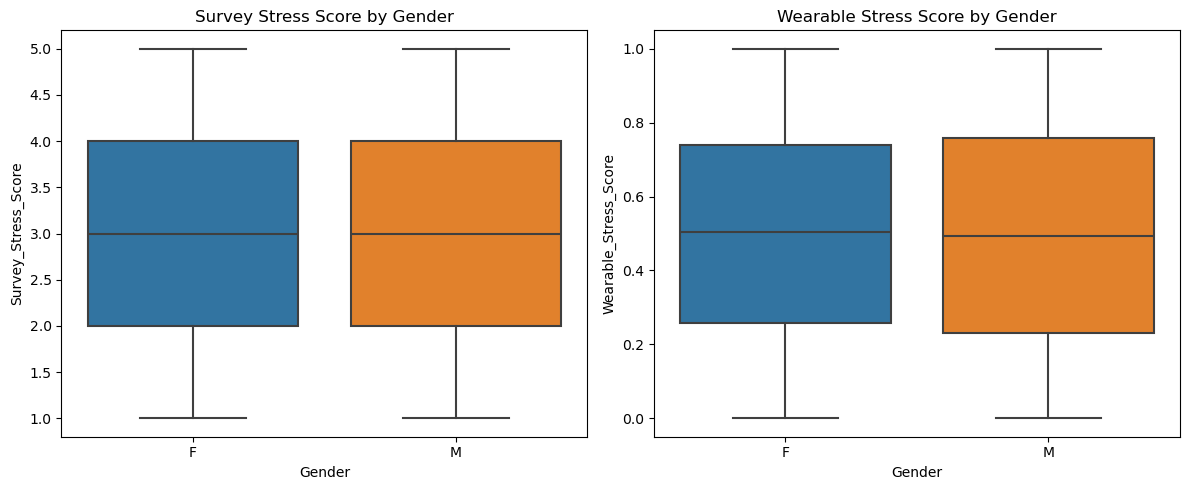

In [33]:
# Compare stress scores by gender
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Gender', y='Survey_Stress_Score')
plt.title('Survey Stress Score by Gender')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Gender', y='Wearable_Stress_Score')
plt.title('Wearable Stress Score by Gender')
plt.tight_layout()
plt.show()

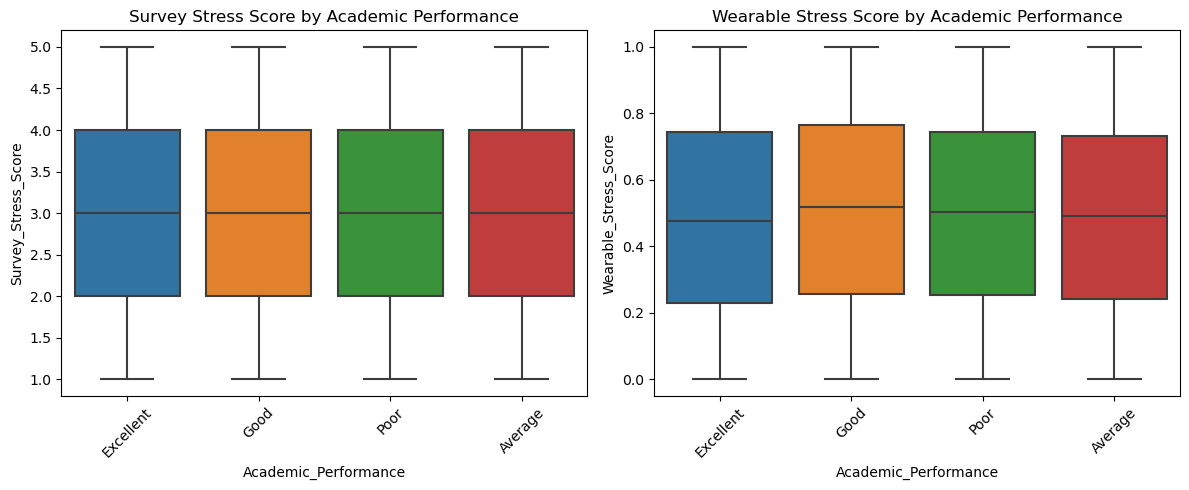

In [34]:
# Stress scores by academic performance
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Academic_Performance', y='Survey_Stress_Score')
plt.title('Survey Stress Score by Academic Performance')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Academic_Performance', y='Wearable_Stress_Score')
plt.title('Wearable Stress Score by Academic Performance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


SDG3: Predicting Student Stress from Daily Habits� Project OverviewThe. We is aimo **predict student stress lels** based on their daily activities and lifestyle habits.

By using real data, we want to discover how things like sleep, exercise, screen time, and academic pressure affect a student's mental well-being. This can help identify students who may need support — early and accur SWt can

**Can we predict student stress levels based on their lifele habits?**

This includes:
- Sleep hours
- Social media usage
- Exercise time
- Academic performanceo schools.

---

## 📁 Dataset Description

We use a cleaned dataset with the following columns:

- `Age`
- `Gender`
- `Social_Media_Hours`
- `Exercise_Hours`
- `Sleep_Hours`
- `Screen_Time_Hours`
- `Survey_Stress_Score`
- `Wearable_Stress_Score` (Target)
- `SuppowAuthor

- *Your Name*
- Data Science for SDG 3 - Student Mental Health Project

